# Transforming images into csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import cv2

In [2]:
def correspondingShuffle(a, b):
    """ Shuffle the numpy array so that a[i] correspond to b[i]"""
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def implt(img, cmp=None, t=''):
    """ Show image using plt """
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()

In [3]:
imglist0 = glob.glob('data/gapdet/0/*.jpg')
imglist1 = glob.glob('data/gapdet/1/*.jpg')

img0 = np.array([np.array(cv2.imread(img, 0)) for img in imglist0])
img1 = np.array([np.array(cv2.imread(img, 0)) for img in imglist1])

# 755 chars and 306 gaps images, dimension 30x60 = 1800
images = np.concatenate([img0.reshape(755,1800), img1.reshape(306, 1800)])
labels = np.concatenate([np.zeros(755), np.ones(306)])

images, labels = correspondingShuffle(images, labels)    

with open('data/gapdet/data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in images:
        writer.writerow(row)
        
with open('data/gapdet/labels.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(labels)
    
print("CSV data files saved.")

CSV data files saved.


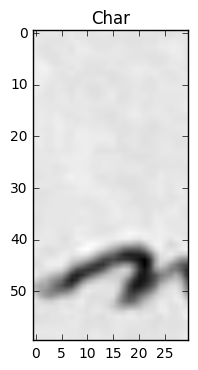

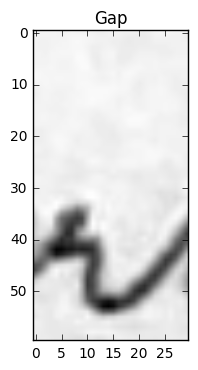

In [4]:
for i in range(len(images)):
    if labels[i] == 0:
        implt(images[i].reshape(60,30), 'gray', 'Char')
        break;
        
for i in range(len(images)):
    if labels[i] == 1:
        implt(images[i].reshape(60,30), 'gray', 'Gap')
        break;